Dual Task Data Analysis
=======================



##+PROPERTY: header-args:ipython :results raw drawer :exports both :async t :session dual<sub>data</sub> :kernel dual<sub>data</sub>



## A few imports



In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys

sys.path.insert(0, '../dual_task')
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Get parent directory (= the project root)
project_root = os.path.join(current_dir, '..')
# Append to system path
sys.path.append(project_root)

print("Python exe")
print(sys.executable)

Python exe
/home/leon/mambaforge/envs/dual_data/bin/python


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dual_data.common.plot_utils import plot_summary

sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '../figs/perf'
golden_ratio = (5**.5 - 1) / 2
width = 6

matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
matplotlib.rcParams['lines.markersize'] = 5
%matplotlib inline
%config InlineBackend.figure_format = 'png'

a test figure


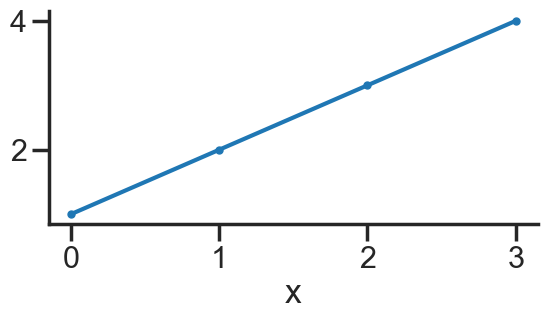

In [4]:
print('a test figure')
plt.figure()
plt.plot([1,2,3,4], '-o')
plt.xlabel('x')
plt.show()

## Behavioral performance



#### Imports



In [5]:
from dual_data.performance.perf_tasks import run_perf_tasks

#### single mouse



In [1]:
run_perf_tasks(mouse='JawsM15', perf_type='correct', reload=0)

0 - a489fbcc-b9d3-422c-a02e-5453a8d98dd5

#### all mice



In [1]:
# mice = ['ChRM04','JawsM15', 'JawsM18', 'ACCM03', 'ACCM04', 'AP02', 'AP12']
mice = ['ChRM04','JawsM15', 'JawsM18']
for mouse in mice:
    run_perf_tasks(mouse=mouse, perf_type='correct', reload=0)
    plt.close('all')

# Out[6]:

# Out[14]:

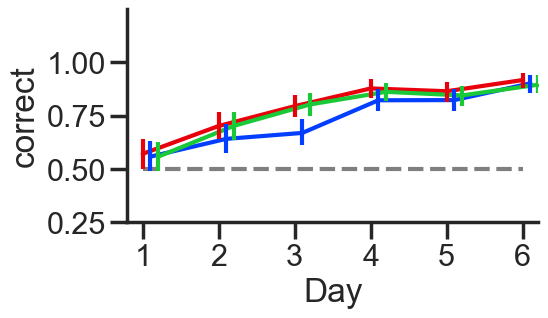

In [1]:
run_perf_tasks(mouse='all', perf_type='correct', reload=0)

#### summary



In [1]:
import pickle as pkl
from dual_data.common.plot_utils import concat_fig

# Out[4]:

# Out[19]:

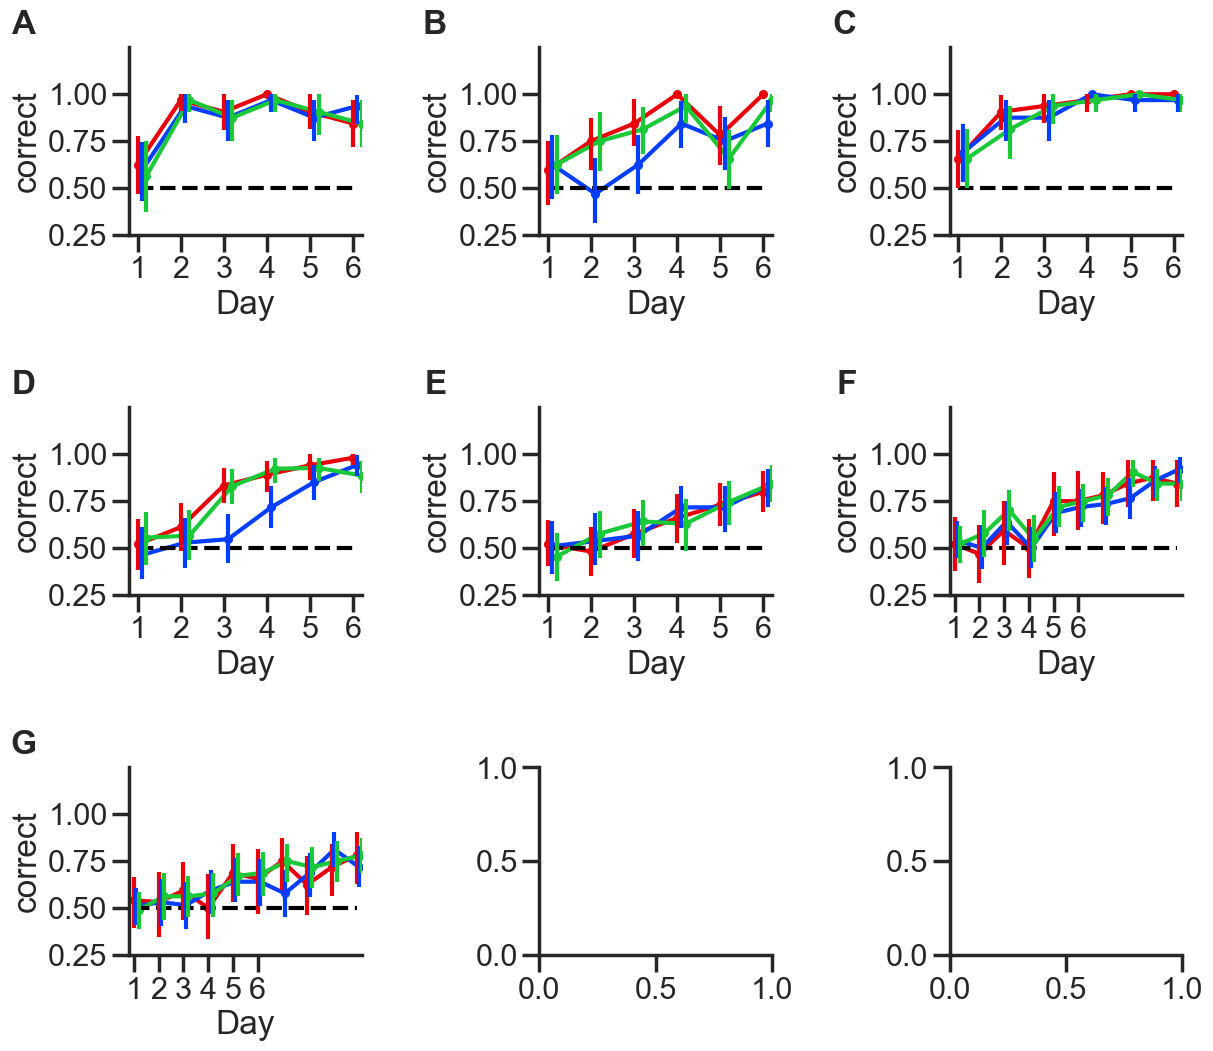

In [1]:
mice = ['ChRM04','JawsM15', 'JawsM18', 'ACCM03', 'ACCM04', 'AP02', 'AP12']
# mice = ['ChRM04','JawsM15', 'JawsM18']

files = ['../figs/' + i + '_behavior_tasks_correct.pkl' for i in mice]
print(files)

figlist = [pkl.load(open(file, "rb")) for file in files]
print(figlist)
plt.close('all')

golden_ratio = (5**.5 - 1) / 2
width = 4.3
height = width * golden_ratio * 1.4
figsize = [width, height]
matplotlib.rcParams['lines.markersize'] = 5.5

concat_fig('summary', figlist, dim=[3, 3], size=figsize, VLINE=0, LABEL=1, LABEL_POS=[-0.4, 1.2])

## Licktime analysis



#### Imports



In [1]:
from scipy.io import loadmat
from dual_data.licks.licks import *

# Out[20]:

#### Data



In [1]:
# path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
# path = '../data/behavior/DualTask-Silencing-Prl-ACC/'
# path = '../data/behavior/DualTask-Silencing-ACC/'

#### Single mouse



In [1]:
i_mouse = 2
i_session = 1

if 'DPA' in path:
    session = 'Dual' # control opto DPA or Dual
else:
    session = 'control' # control opto DPA or Dual

data = loadmat(path + session + '_mouse_%d/session_%d' % (i_mouse, i_session))

# Out[31]:

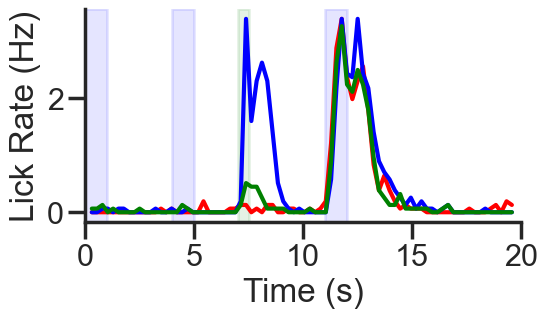

In [1]:
licks_dpa, licks_go, licks_nogo = get_licks_mouse(data, path, response='correct', trial_length=20, verbose=1)
licks_all = [np.hstack(licks_dpa), np.hstack(licks_go), np.hstack(licks_nogo)]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')

#### All mice



In [1]:
mice_dpa, mice_go, mice_nogo = get_licks_mice(path, n_session=11, response="incorrect")

# Out[40]:

##### control



# Out[41]:

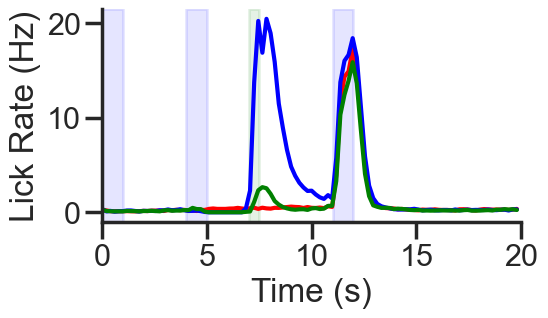

In [1]:
n_mice = 9
dpa_all = hstack_with_padding(mice_dpa[:n_mice])
go_all = hstack_with_padding(mice_go[:n_mice])
nogo_all = hstack_with_padding(mice_nogo[:n_mice])

licks_all = [ np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto', n_mice=n_mice)

##### opto



# Out[42]:

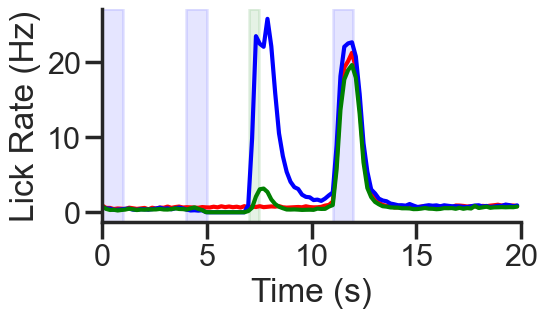

In [1]:
dpa_all = hstack_with_padding(mice_dpa[n_mice:])
go_all = hstack_with_padding(mice_go[n_mice:])
nogo_all = hstack_with_padding(mice_nogo[n_mice:])

licks_all = [ np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto', n_mice=n_mice)

## Temporal decoding



#### Imports



In [1]:
from dual_data.decode.mne_scores import run_mne_scores
from dual_data.decode.mne_cross_temp import run_mne_cross_temp

# Out[45]:

#### Sample classification



# Out[8]:

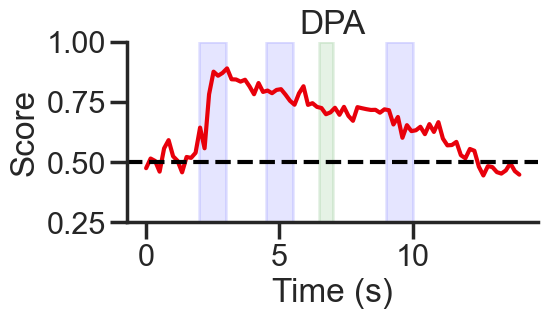

In [1]:
run_mne_scores(features='sample', task='DPA', day='first')

# Out[34]:

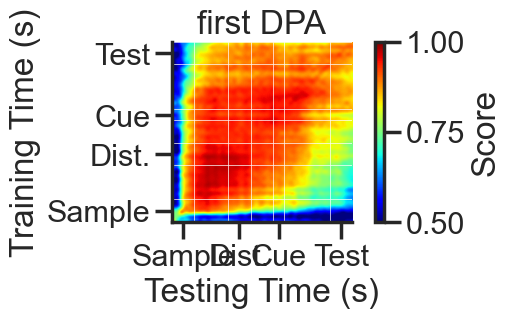

In [1]:
run_mne_cross_temp(features='sample', task='DPA', day='first')

#### Distractor classification



# Out[103]:

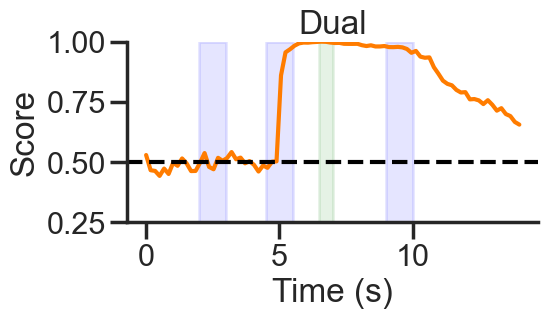

In [1]:
run_mne_scores(features='distractor', task='Dual', day='first')
run_mne_scores(features='distractor', task='Dual', day='last')

# Out[37]:

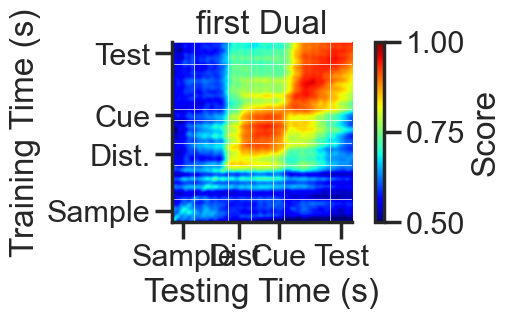

In [1]:
run_mne_cross_temp(features='distractor', task='Dual', day='first')

#### Choice decoding



##### single mouse



# Out[63]:

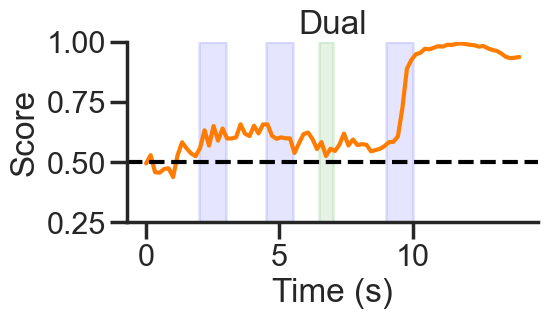

In [1]:
mouse='ChRM04'
run_mne_scores(mouse=mouse, features='choice', task='Dual', day='first', bootstrap=0, balance=1)

# Out[64]:

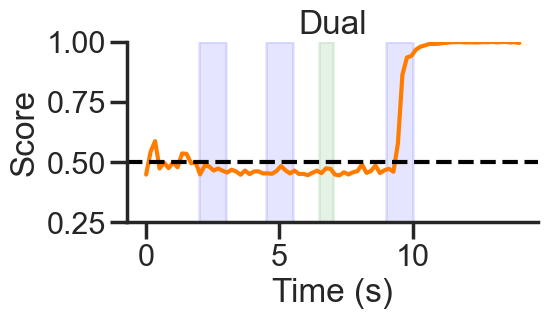

In [1]:
run_mne_scores(mouse=mouse, features='choice', task='Dual', day='last', laser=0, balance=1)

##### all mice



In [1]:
mice = ['ChRM04','JawsM15', 'JawsM18', 'ACCM03', 'ACCM04']
tasks = ['DPA', 'DualGo', 'DualNoGo', 'Dual']
for mouse in mice:
    for task in tasks:
        run_mne_scores(mouse=mouse, features='choice', task=task, day='first', bootstrap=1)
        run_mne_scores(mouse=mouse, features='choice', task=task, day='last', bootstrap=1)
        plt.close('all')

## Overlaps



#### Imports



In [5]:
from dual_data.overlap.get_overlap import run_get_overlap

#### Sample Overlap



##### single mouse



loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN fdr PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (60, 693, 84) X_S2 (65, 693, 84)
n_max 60
X_avg (120, 693)


boots_coefs (1000, 693)
p_val (693,)
significant 166
X_fs (120, 166)


(166,) (166,) (693,)
samples (120,) features (693,) non zero 166
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (27, 693, 84) X_S2 (28, 693, 84)
n_max 27
X (54, 693, 84) y (54,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 3/1000 [00:00<00:36, 27.49it/s]

bootstrap:   7% 66/1000 [00:00<00:02, 368.53it/s]

bootstrap:  14% 142/1000 [00:00<00:01, 539.39it/s]

bootstrap:  20% 197/1000 [00:00<00:01, 516.51it/s]

bootstrap:  26% 256/1000 [00:00<00:01, 539.04it/s]

bootstrap:  34% 345/1000 [00:00<00:01, 648.21it/s]

bootstrap:  41% 411/1000 [00:00<00:01, 504.74it/s]

bootstrap:  60% 605/1000 [00:00<00:00, 870.91it/s]

bootstrap:  70% 703/1000 [00:01<00:00, 672.36it/s]

bootstrap:  81% 811/1000 [00:01<00:00, 761.68it/s]

bootstrap:  90% 900/1000 [00:01<00:00, 673.24it/s]

bootstrap:  99% 986/1000 [00:01<00:00, 711.44it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 483.17it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN fdr PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (79, 693, 84) X_S2 (81, 693, 84)
n_max 79
X_avg (158, 693)


boots_coefs (1000, 693)
p_val (693,)
significant 226
X_fs (158, 226)


(226,) (226,) (693,)
samples (158,) features (693,) non zero 226
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (38, 693, 84) X_S2 (40, 693, 84)
n_max 38
X (76, 693, 84) y (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:14,  7.41it/s]

bootstrap:   1% 13/1000 [00:00<00:15, 63.86it/s]

bootstrap:   7% 72/1000 [00:00<00:03, 283.56it/s]

bootstrap:  14% 140/1000 [00:00<00:01, 431.30it/s]

bootstrap:  19% 186/1000 [00:00<00:01, 433.08it/s]

bootstrap:  23% 231/1000 [00:00<00:02, 364.02it/s]

bootstrap:  27% 271/1000 [00:00<00:02, 263.06it/s]

bootstrap:  33% 327/1000 [00:01<00:02, 328.02it/s]

bootstrap:  46% 455/1000 [00:01<00:00, 554.83it/s]

bootstrap:  53% 527/1000 [00:01<00:00, 596.49it/s]

bootstrap:  60% 597/1000 [00:01<00:00, 512.47it/s]

bootstrap:  66% 657/1000 [00:01<00:00, 415.35it/s]

bootstrap:  83% 830/1000 [00:01<00:00, 687.14it/s]

bootstrap:  92% 916/1000 [00:01<00:00, 604.26it/s]

bootstrap:  99% 990/1000 [00:02<00:00, 362.70it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 368.43it/s]

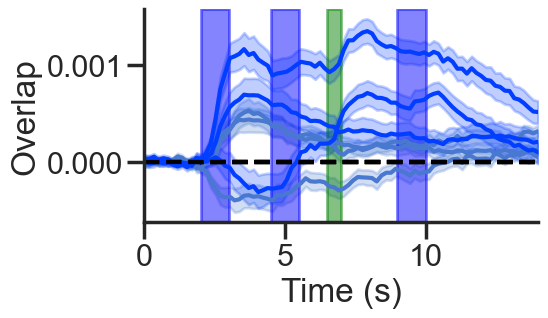

In [13]:
mouse = 'JawsM15'
run_get_overlap(mouse=mouse, features='sample', task='DualGo', day='first', method='bolasso', balance=1, prescreen='fdr')
run_get_overlap(mouse=mouse, features='sample', task='DualGo', day='last', method='bolasso', balance=1, prescreen='fdr')

##### all mice



In [1]:
mice = ['ChRM04', 'JawsM15', 'JawsM18', 'ACCM03', 'ACCM04']
tasks = ['DPA', 'DualGo', 'DualNoGo']

# mice = ['Ja']
# tasks = ['DPA', 'DualGo', 'DualNoGo']

for mouse in mice:
    for task in tasks:
        run_get_overlap(mouse=mouse, features='sample', task=task, day='first', method='bolasso')
        run_get_overlap(mouse=mouse, features='sample', task=task, day='last', method='bolasso')
        plt.close('all')

# Out[53]:

##### summary



In [6]:
from dual_data.common.plot_utils import concat_fig

# Out[56]:

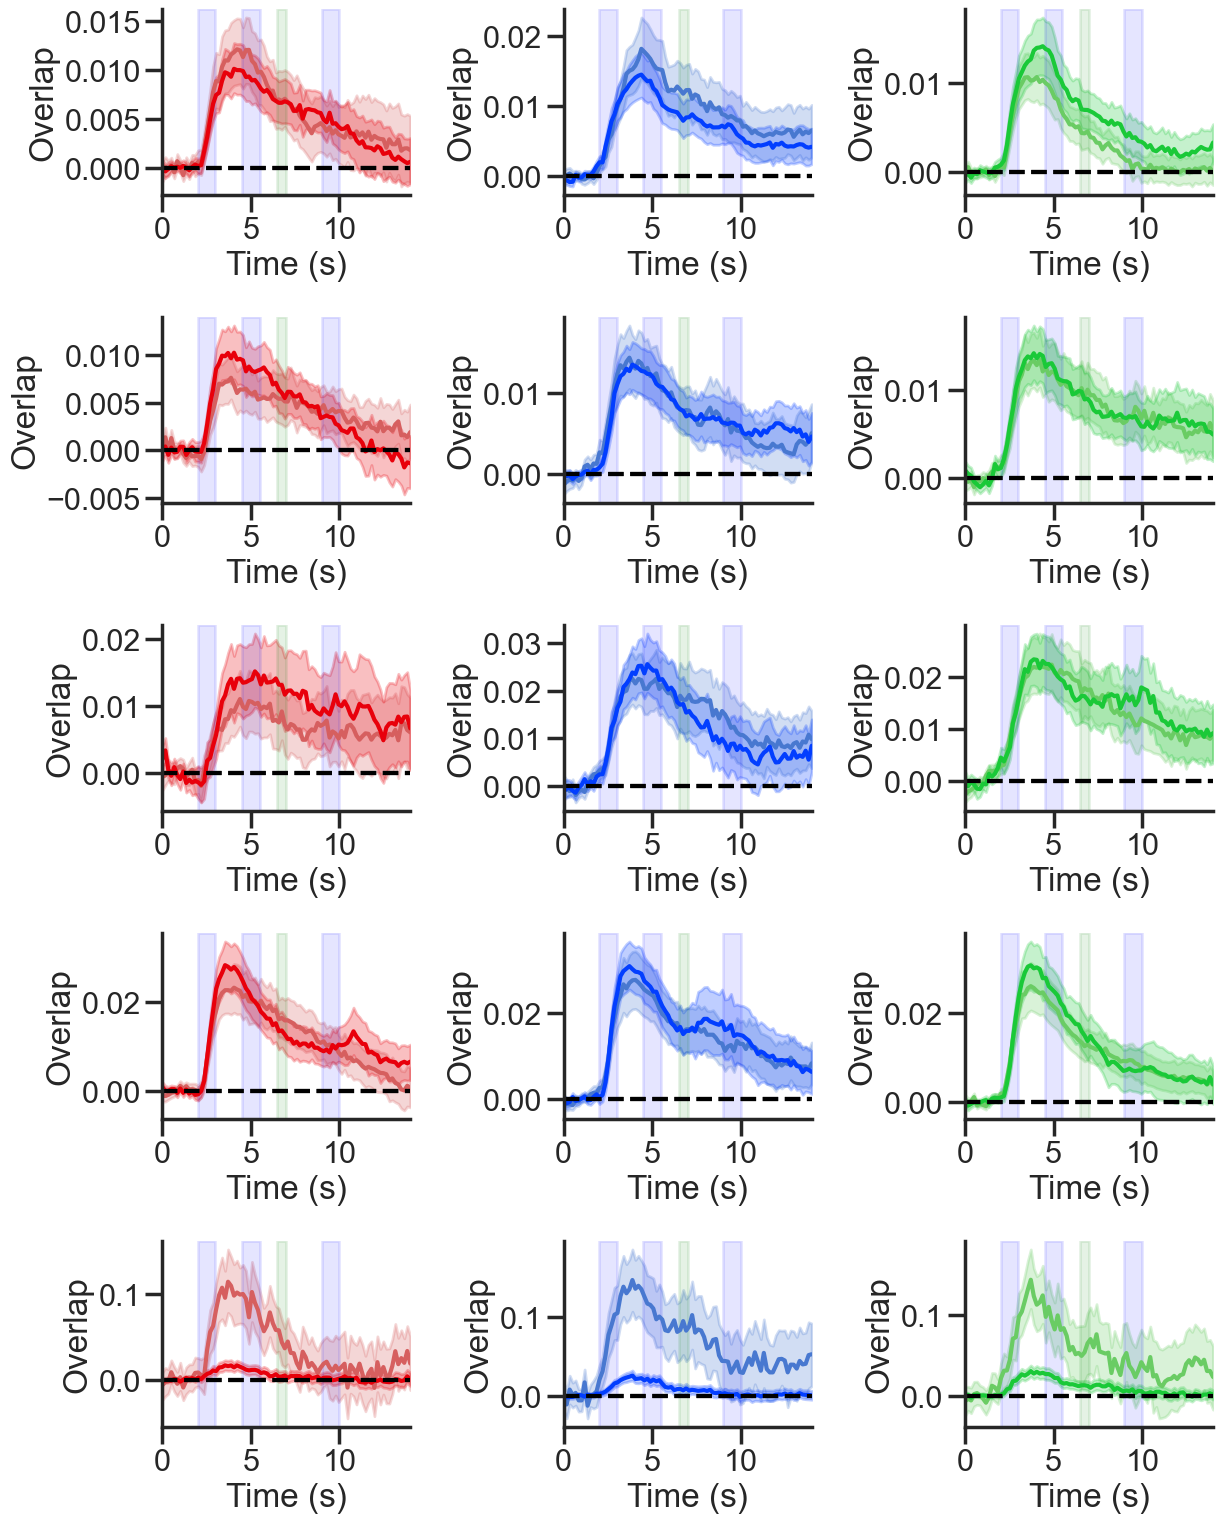

In [1]:
# mice = ['ChRM04', 'JawsM15', 'JawsM18', 'ACCM03', 'ACCM04']

import pickle as pkl
files = ['../figs/' + i + '_' + j + '_sample_overlap.pkl' for i in mice for j in tasks]
print(files)

figlist = [pkl.load(open(file, "rb")) for file in files]
print(figlist)
plt.close('all')

golden_ratio = (5**.5 - 1) / 2
width = 4.25
height = width * golden_ratio * 1.2
figsize = [width, height]

concat_fig('summary', figlist, dim=[len(mice), len(tasks)], size=figsize)

* Distractor overlap



In [14]:
mouse = 'JawsM15'
features = 'distractor'
task = 'DualGo'

In [ ]:
run_get_overlap(mouse=mouse, features=features, task=task, day='first', method='bolasso', bolasso_pval=0.001, balance=1, prescreen='fdr')
run_get_overlap(mouse=mouse, features=features, task=task, day='last', method='bolasso', bolasso_pval=0.001, balance=1, prescreen='fdr')

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN fdr PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (55, 693, 84) X_S2 (70, 693, 84)
n_max 55
X_avg (110, 693)


boots_coefs (1000, 693)
p_val (693,)
significant 185
X_fs (110, 185)


(185,) (185,) (693,)
samples (110,) features (693,) non zero 185
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (27, 693, 84) X_S2 (28, 693, 84)
n_max 27
X (54, 693, 84) y (54,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:53,  8.78it/s]

bootstrap:   4% 36/1000 [00:00<00:04, 197.03it/s]

bootstrap:  13% 126/1000 [00:00<00:01, 504.10it/s]

bootstrap:  20% 200/1000 [00:00<00:01, 591.09it/s]

bootstrap:  27% 271/1000 [00:00<00:01, 624.53it/s]

bootstrap:  34% 335/1000 [00:00<00:01, 588.88it/s]

bootstrap:  40% 395/1000 [00:00<00:01, 532.22it/s]

bootstrap:  51% 509/1000 [00:00<00:00, 703.62it/s]

bootstrap:  59% 591/1000 [00:00<00:00, 734.95it/s]

bootstrap:  68% 683/1000 [00:01<00:00, 780.17it/s]

bootstrap:  77% 770/1000 [00:01<00:00, 806.28it/s]

bootstrap:  85% 852/1000 [00:01<00:00, 697.07it/s]

bootstrap:  95% 954/1000 [00:01<00:00, 782.44it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 463.78it/s]

* all mice



In [32]:
mice = ['ChRM04','JawsM15', 'JawsM18', 'ACCM03', 'ACCM04']
tasks = ['DPA', 'DualGo', 'DualNoGo']
for mouse in mice:
    for task in tasks:
        run_get_overlap(mouse=mouse, features='distractor', task=task, day='first', method='bolasso', bolasso_pval=0.001, balance=1)
        run_get_overlap(mouse=mouse, features='distractor', task=task, day='last', method='bolasso', bolasso_pval=0.001, balance=1)
        plt.close('all')

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (77, 668, 84) X_S2 (77, 668, 84)
n_max 77
X_avg (154, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 458
X_fs (154, 458)


samples (154,) features (668,) non zero 458
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (41, 668, 84) X_S2 (39, 668, 84)
n_max 39
(78, 668, 84) (78,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:53,  5.75it/s]

bootstrap:   4% 44/1000 [00:00<00:04, 196.73it/s]

bootstrap:  11% 114/1000 [00:00<00:02, 393.43it/s]

bootstrap:  16% 160/1000 [00:00<00:02, 329.33it/s]

bootstrap:  23% 234/1000 [00:00<00:01, 437.57it/s]

bootstrap:  28% 285/1000 [00:00<00:02, 303.95it/s]

bootstrap:  35% 351/1000 [00:01<00:01, 377.84it/s]

bootstrap:  42% 423/1000 [00:01<00:01, 457.10it/s]

bootstrap:  52% 515/1000 [00:01<00:00, 572.37it/s]

bootstrap:  58% 583/1000 [00:01<00:01, 407.73it/s]

bootstrap:  66% 658/1000 [00:01<00:00, 476.95it/s]

bootstrap:  75% 750/1000 [00:01<00:00, 573.79it/s]

bootstrap:  82% 824/1000 [00:01<00:00, 613.32it/s]

bootstrap:  90% 895/1000 [00:02<00:00, 488.90it/s]

bootstrap:  99% 988/1000 [00:02<00:00, 419.76it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 390.06it/s]

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (89, 668, 84) X_S2 (87, 668, 84)
n_max 87
X_avg (174, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 496
X_fs (174, 496)


samples (174,) features (668,) non zero 496
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (47, 668, 84) X_S2 (41, 668, 84)
n_max 41
(82, 668, 84) (82,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:38,  6.32it/s]

bootstrap:   2% 24/1000 [00:00<00:08, 112.32it/s]

bootstrap:   4% 39/1000 [00:00<00:07, 126.44it/s]

bootstrap:   9% 91/1000 [00:00<00:03, 269.11it/s]

bootstrap:  17% 174/1000 [00:00<00:01, 459.32it/s]

bootstrap:  24% 240/1000 [00:00<00:01, 501.45it/s]

bootstrap:  29% 293/1000 [00:01<00:02, 269.23it/s]

bootstrap:  36% 359/1000 [00:01<00:01, 342.13it/s]

bootstrap:  50% 495/1000 [00:01<00:00, 532.92it/s]

bootstrap:  56% 563/1000 [00:01<00:01, 390.04it/s]

bootstrap:  62% 618/1000 [00:01<00:00, 384.00it/s]

bootstrap:  70% 699/1000 [00:01<00:00, 464.28it/s]

bootstrap:  80% 800/1000 [00:01<00:00, 581.11it/s]

bootstrap:  88% 878/1000 [00:02<00:00, 626.66it/s]

bootstrap:  95% 951/1000 [00:02<00:00, 495.69it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 373.32it/s]

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (77, 668, 84) X_S2 (77, 668, 84)
n_max 77
X_avg (154, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 462
X_fs (154, 462)


samples (154,) features (668,) non zero 462
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (39, 668, 84) X_S2 (38, 668, 84)
n_max 38
(76, 668, 84) (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:34,  6.47it/s]

bootstrap:   5% 53/1000 [00:00<00:03, 252.70it/s]

bootstrap:  11% 110/1000 [00:00<00:02, 358.27it/s]

bootstrap:  15% 150/1000 [00:00<00:02, 352.95it/s]

bootstrap:  20% 197/1000 [00:00<00:02, 389.42it/s]

bootstrap:  25% 249/1000 [00:00<00:01, 426.70it/s]

bootstrap:  29% 293/1000 [00:00<00:01, 394.16it/s]

bootstrap:  34% 335/1000 [00:01<00:02, 298.97it/s]

bootstrap:  38% 385/1000 [00:01<00:01, 342.64it/s]

bootstrap:  43% 433/1000 [00:01<00:01, 375.36it/s]

bootstrap:  48% 475/1000 [00:01<00:01, 378.25it/s]

bootstrap:  59% 587/1000 [00:01<00:00, 572.68it/s]

bootstrap:  66% 662/1000 [00:01<00:00, 615.07it/s]

bootstrap:  73% 727/1000 [00:01<00:00, 590.33it/s]

bootstrap:  84% 837/1000 [00:01<00:00, 729.49it/s]

bootstrap:  91% 913/1000 [00:01<00:00, 562.70it/s]

bootstrap:  98% 984/1000 [00:02<00:00, 596.76it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 368.89it/s]

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (89, 668, 84) X_S2 (87, 668, 84)
n_max 87
X_avg (174, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 503
X_fs (174, 503)


samples (174,) features (668,) non zero 503
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (43, 668, 84) X_S2 (46, 668, 84)
n_max 43
(86, 668, 84) (86,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:01,  8.24it/s]

bootstrap:   2% 25/1000 [00:00<00:07, 132.78it/s]

bootstrap:   4% 44/1000 [00:00<00:06, 154.85it/s]

bootstrap:  13% 126/1000 [00:00<00:02, 405.23it/s]

bootstrap:  17% 168/1000 [00:00<00:03, 274.49it/s]

bootstrap:  20% 202/1000 [00:00<00:03, 242.39it/s]

bootstrap:  24% 237/1000 [00:00<00:02, 265.64it/s]

bootstrap:  27% 269/1000 [00:01<00:03, 208.75it/s]

bootstrap:  30% 297/1000 [00:01<00:03, 223.36it/s]

bootstrap:  38% 375/1000 [00:01<00:01, 346.57it/s]

bootstrap:  43% 433/1000 [00:01<00:01, 401.21it/s]

bootstrap:  52% 517/1000 [00:01<00:00, 511.37it/s]

bootstrap:  57% 575/1000 [00:01<00:00, 527.25it/s]

bootstrap:  63% 632/1000 [00:01<00:00, 393.89it/s]

bootstrap:  68% 680/1000 [00:02<00:00, 389.90it/s]

bootstrap:  76% 762/1000 [00:02<00:00, 487.96it/s]

bootstrap:  85% 852/1000 [00:02<00:00, 585.98it/s]

bootstrap:  92% 917/1000 [00:02<00:00, 468.20it/s]

bootstrap:  99% 992/1000 [00:02<00:00, 531.23it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 341.72it/s]

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (77, 668, 84) X_S2 (77, 668, 84)
n_max 77
X_avg (154, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 467
X_fs (154, 467)


samples (154,) features (668,) non zero 467
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (39, 668, 84) X_S2 (38, 668, 84)
n_max 38
(76, 668, 84) (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:44,  6.07it/s]

bootstrap:   2% 18/1000 [00:00<00:12, 80.90it/s]

bootstrap:   6% 60/1000 [00:00<00:04, 214.57it/s]

bootstrap:  17% 167/1000 [00:00<00:01, 520.73it/s]

bootstrap:  22% 224/1000 [00:00<00:01, 416.50it/s]

bootstrap:  27% 273/1000 [00:00<00:02, 274.36it/s]

bootstrap:  34% 337/1000 [00:01<00:01, 345.65it/s]

bootstrap:  44% 441/1000 [00:01<00:01, 496.57it/s]

bootstrap:  52% 525/1000 [00:01<00:00, 576.01it/s]

bootstrap:  60% 595/1000 [00:01<00:00, 564.89it/s]

bootstrap:  66% 660/1000 [00:01<00:00, 543.00it/s]

bootstrap:  73% 731/1000 [00:01<00:00, 583.30it/s]

bootstrap:  82% 822/1000 [00:01<00:00, 663.10it/s]

bootstrap:  89% 893/1000 [00:01<00:00, 525.97it/s]

bootstrap:  98% 983/1000 [00:02<00:00, 611.98it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 385.02it/s]

loading files from /home/leon/dual_task/dual_data//data/ChRM04


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (89, 668, 84) X_S2 (87, 668, 84)
n_max 87
X_avg (174, 668)


boots_coefs (1000, 668)


p_val (668,)
significant 506
X_fs (174, 506)


samples (174,) features (668,) non zero 506
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (42, 668, 84) X_S2 (45, 668, 84)
n_max 42
(84, 668, 84) (84,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:03,  8.07it/s]

bootstrap:   0% 2/1000 [00:00<03:01,  5.50it/s]

bootstrap:   8% 80/1000 [00:00<00:03, 249.68it/s]

bootstrap:  13% 129/1000 [00:00<00:02, 323.93it/s]

bootstrap:  17% 170/1000 [00:00<00:03, 249.16it/s]

bootstrap:  23% 227/1000 [00:00<00:02, 324.73it/s]

bootstrap:  27% 269/1000 [00:00<00:02, 343.08it/s]

bootstrap:  31% 311/1000 [00:01<00:01, 356.08it/s]

bootstrap:  36% 365/1000 [00:01<00:01, 388.56it/s]

bootstrap:  42% 415/1000 [00:01<00:01, 407.69it/s]

bootstrap:  46% 459/1000 [00:01<00:01, 359.62it/s]

bootstrap:  51% 509/1000 [00:01<00:01, 393.09it/s]

bootstrap:  56% 555/1000 [00:01<00:01, 407.57it/s]

bootstrap:  60% 599/1000 [00:01<00:01, 385.29it/s]

bootstrap:  64% 645/1000 [00:01<00:00, 399.46it/s]

bootstrap:  72% 719/1000 [00:02<00:00, 491.74it/s]

bootstrap:  82% 824/1000 [00:02<00:00, 646.64it/s]

bootstrap:  89% 892/1000 [00:02<00:00, 521.75it/s]

bootstrap:  98% 978/1000 [00:02<00:00, 603.85it/s]

bootstrap: 100% 1000/1000 [00:03<00:00, 332.36it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (55, 693, 84) X_S2 (70, 693, 84)
n_max 55
X_avg (110, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 550
X_fs (110, 550)


samples (110,) features (693,) non zero 550
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (35, 693, 84) X_S2 (35, 693, 84)
n_max 35
(70, 693, 84) (70,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:41,  9.89it/s]

bootstrap:   2% 22/1000 [00:00<00:08, 119.65it/s]

bootstrap:   8% 75/1000 [00:00<00:03, 299.63it/s]

bootstrap:  16% 159/1000 [00:00<00:01, 504.58it/s]

bootstrap:  21% 210/1000 [00:00<00:01, 467.72it/s]

bootstrap:  26% 259/1000 [00:00<00:01, 388.50it/s]

bootstrap:  30% 301/1000 [00:00<00:02, 331.32it/s]

bootstrap:  39% 387/1000 [00:00<00:01, 457.39it/s]

bootstrap:  47% 467/1000 [00:01<00:00, 545.05it/s]

bootstrap:  56% 565/1000 [00:01<00:00, 659.67it/s]

bootstrap:  64% 637/1000 [00:01<00:00, 581.82it/s]

bootstrap:  71% 707/1000 [00:01<00:00, 608.78it/s]

bootstrap:  79% 789/1000 [00:01<00:00, 662.92it/s]

bootstrap:  86% 859/1000 [00:01<00:00, 614.24it/s]

bootstrap:  92% 924/1000 [00:01<00:00, 546.40it/s]

bootstrap:  99% 988/1000 [00:02<00:00, 435.39it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 408.70it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (78, 693, 84) X_S2 (82, 693, 84)
n_max 78
X_avg (156, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 579
X_fs (156, 579)


samples (156,) features (693,) non zero 579
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (45, 693, 84) X_S2 (44, 693, 84)
n_max 44
(88, 693, 84) (88,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<05:09,  3.23it/s]

bootstrap:   1% 6/1000 [00:00<00:55, 17.98it/s]

bootstrap:   3% 27/1000 [00:00<00:12, 77.47it/s]

bootstrap:   9% 87/1000 [00:00<00:03, 234.86it/s]

bootstrap:  12% 121/1000 [00:00<00:03, 266.01it/s]

bootstrap:  16% 165/1000 [00:00<00:02, 318.09it/s]

bootstrap:  25% 250/1000 [00:00<00:01, 477.05it/s]

bootstrap:  30% 302/1000 [00:01<00:01, 359.19it/s]

bootstrap:  34% 345/1000 [00:01<00:01, 359.65it/s]

bootstrap:  39% 386/1000 [00:01<00:01, 335.22it/s]

bootstrap:  48% 484/1000 [00:01<00:01, 489.79it/s]

bootstrap:  54% 540/1000 [00:01<00:01, 438.19it/s]

bootstrap:  59% 590/1000 [00:01<00:00, 443.87it/s]

bootstrap:  64% 639/1000 [00:01<00:00, 391.64it/s]

bootstrap:  68% 682/1000 [00:02<00:00, 387.40it/s]

bootstrap:  75% 751/1000 [00:02<00:00, 446.98it/s]

bootstrap:  80% 799/1000 [00:02<00:00, 373.73it/s]

bootstrap:  84% 843/1000 [00:02<00:00, 356.17it/s]

bootstrap:  88% 881/1000 [00:02<00:00, 351.02it/s]

bootstrap:  97% 968/1000 [00:02<00:00, 476.09it/s]

bootstrap: 100% 1000/1000 [00:03<00:00, 319.54it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (55, 693, 84) X_S2 (70, 693, 84)
n_max 55
X_avg (110, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 560
X_fs (110, 560)


samples (110,) features (693,) non zero 560
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (27, 693, 84) X_S2 (28, 693, 84)
n_max 27
(54, 693, 84) (54,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:43,  9.62it/s]

bootstrap:   7% 69/1000 [00:00<00:02, 396.62it/s]

bootstrap:  14% 143/1000 [00:00<00:01, 551.55it/s]

bootstrap:  23% 226/1000 [00:00<00:01, 656.56it/s]

bootstrap:  29% 293/1000 [00:00<00:01, 616.41it/s]

bootstrap:  40% 397/1000 [00:00<00:00, 751.96it/s]

bootstrap:  51% 513/1000 [00:00<00:00, 876.44it/s]

bootstrap:  60% 603/1000 [00:00<00:00, 830.38it/s]

bootstrap:  69% 688/1000 [00:00<00:00, 737.61it/s]

bootstrap:  84% 843/1000 [00:01<00:00, 953.72it/s]

bootstrap:  94% 943/1000 [00:01<00:00, 940.48it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 497.34it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (78, 693, 84) X_S2 (82, 693, 84)
n_max 78
X_avg (156, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 575
X_fs (156, 575)


samples (156,) features (693,) non zero 575
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (38, 693, 84) X_S2 (40, 693, 84)
n_max 38
(76, 693, 84) (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<04:22,  3.81it/s]

bootstrap:   2% 20/1000 [00:00<00:14, 68.86it/s]

bootstrap:   8% 79/1000 [00:00<00:03, 240.81it/s]

bootstrap:  16% 165/1000 [00:00<00:01, 426.53it/s]

bootstrap:  23% 231/1000 [00:00<00:01, 496.83it/s]

bootstrap:  29% 292/1000 [00:00<00:01, 524.33it/s]

bootstrap:  35% 349/1000 [00:00<00:01, 415.21it/s]

bootstrap:  41% 413/1000 [00:01<00:01, 469.95it/s]

bootstrap:  48% 478/1000 [00:01<00:01, 513.27it/s]

bootstrap:  53% 534/1000 [00:01<00:00, 501.08it/s]

bootstrap:  59% 588/1000 [00:01<00:00, 506.50it/s]

bootstrap:  64% 641/1000 [00:01<00:00, 490.58it/s]

bootstrap:  69% 692/1000 [00:01<00:00, 435.13it/s]

bootstrap:  77% 766/1000 [00:01<00:00, 509.30it/s]

bootstrap:  82% 820/1000 [00:01<00:00, 441.91it/s]

bootstrap:  90% 902/1000 [00:02<00:00, 533.95it/s]

bootstrap:  96% 960/1000 [00:02<00:00, 481.22it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 408.79it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (55, 693, 84) X_S2 (70, 693, 84)
n_max 55
X_avg (110, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 559
X_fs (110, 559)


samples (110,) features (693,) non zero 559
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (33, 693, 84) X_S2 (37, 693, 84)
n_max 33
(66, 693, 84) (66,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:51,  8.98it/s]

bootstrap:   5% 48/1000 [00:00<00:03, 266.92it/s]

bootstrap:  13% 130/1000 [00:00<00:01, 497.81it/s]

bootstrap:  18% 184/1000 [00:00<00:01, 513.49it/s]

bootstrap:  26% 263/1000 [00:00<00:01, 609.65it/s]

bootstrap:  32% 325/1000 [00:00<00:01, 472.71it/s]

bootstrap:  40% 405/1000 [00:00<00:01, 557.09it/s]

bootstrap:  51% 513/1000 [00:00<00:00, 701.25it/s]

bootstrap:  59% 589/1000 [00:01<00:00, 613.34it/s]

bootstrap:  66% 656/1000 [00:01<00:00, 588.89it/s]

bootstrap:  80% 799/1000 [00:01<00:00, 794.81it/s]

bootstrap:  88% 885/1000 [00:01<00:00, 693.24it/s]

bootstrap:  99% 987/1000 [00:01<00:00, 768.66it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 441.44it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (78, 693, 84) X_S2 (82, 693, 84)
n_max 78
X_avg (156, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 575
X_fs (156, 575)


samples (156,) features (693,) non zero 575
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (41, 693, 84) X_S2 (41, 693, 84)
n_max 41
(82, 693, 84) (82,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<03:08,  5.29it/s]

bootstrap:   1% 13/1000 [00:00<00:18, 54.64it/s]

bootstrap:   6% 65/1000 [00:00<00:04, 231.08it/s]

bootstrap:  11% 112/1000 [00:00<00:02, 313.30it/s]

bootstrap:  19% 189/1000 [00:00<00:01, 464.51it/s]

bootstrap:  24% 240/1000 [00:00<00:01, 444.15it/s]

bootstrap:  29% 287/1000 [00:01<00:02, 268.33it/s]

bootstrap:  34% 341/1000 [00:01<00:02, 323.22it/s]

bootstrap:  48% 481/1000 [00:01<00:00, 562.26it/s]

bootstrap:  55% 553/1000 [00:01<00:00, 490.58it/s]

bootstrap:  62% 615/1000 [00:01<00:00, 414.65it/s]

bootstrap:  71% 713/1000 [00:01<00:00, 526.05it/s]

bootstrap:  84% 837/1000 [00:01<00:00, 680.80it/s]

bootstrap:  92% 919/1000 [00:02<00:00, 569.24it/s]

bootstrap:  99% 989/1000 [00:02<00:00, 346.55it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 365.82it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (78, 444, 84) X_S2 (77, 444, 84)
n_max 77
X_avg (154, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 360
X_fs (154, 360)


samples (154,) features (444,) non zero 360
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (41, 444, 84) X_S2 (39, 444, 84)
n_max 39
(78, 444, 84) (78,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 5/1000 [00:00<00:22, 44.52it/s]

bootstrap:  10% 95/1000 [00:00<00:01, 516.89it/s]

bootstrap:  16% 161/1000 [00:00<00:01, 572.57it/s]

bootstrap:  22% 222/1000 [00:00<00:01, 586.75it/s]

bootstrap:  28% 283/1000 [00:00<00:01, 410.96it/s]

bootstrap:  40% 397/1000 [00:00<00:01, 599.64it/s]

bootstrap:  60% 599/1000 [00:00<00:00, 981.43it/s]

bootstrap:  71% 712/1000 [00:00<00:00, 913.06it/s]

bootstrap:  85% 848/1000 [00:01<00:00, 1028.09it/s]

bootstrap:  96% 961/1000 [00:01<00:00, 946.49it/s] 

bootstrap: 100% 1000/1000 [00:02<00:00, 488.75it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (94, 444, 84) X_S2 (94, 444, 84)
n_max 94


X_avg (188, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 366
X_fs (188, 366)


samples (188,) features (444,) non zero 366
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (48, 444, 84) X_S2 (47, 444, 84)
n_max 47
(94, 444, 84) (94,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 2/1000 [00:00<00:55, 17.83it/s]

bootstrap:   5% 53/1000 [00:00<00:03, 292.24it/s]

bootstrap:  12% 118/1000 [00:00<00:01, 447.80it/s]

bootstrap:  16% 164/1000 [00:00<00:02, 293.57it/s]

bootstrap:  23% 227/1000 [00:00<00:02, 382.13it/s]

bootstrap:  27% 273/1000 [00:00<00:01, 365.54it/s]

bootstrap:  32% 317/1000 [00:00<00:01, 383.08it/s]

bootstrap:  38% 379/1000 [00:00<00:01, 445.14it/s]

bootstrap:  52% 519/1000 [00:01<00:00, 706.09it/s]

bootstrap:  62% 621/1000 [00:01<00:00, 787.21it/s]

bootstrap:  70% 704/1000 [00:01<00:00, 682.91it/s]

bootstrap:  81% 814/1000 [00:01<00:00, 785.13it/s]

bootstrap:  90% 898/1000 [00:01<00:00, 771.43it/s]

bootstrap:  98% 979/1000 [00:01<00:00, 720.54it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 426.19it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (78, 444, 84) X_S2 (77, 444, 84)
n_max 77


X_avg (154, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 351
X_fs (154, 351)


samples (154,) features (444,) non zero 351
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (37, 444, 84) X_S2 (41, 444, 84)
n_max 37
(74, 444, 84) (74,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 2/1000 [00:00<00:50, 19.59it/s]

bootstrap:  10% 97/1000 [00:00<00:01, 556.46it/s]

bootstrap:  15% 153/1000 [00:00<00:01, 506.01it/s]

bootstrap:  24% 245/1000 [00:00<00:01, 627.83it/s]

bootstrap:  31% 311/1000 [00:00<00:01, 637.90it/s]

bootstrap:  42% 425/1000 [00:00<00:00, 799.54it/s]

bootstrap:  51% 507/1000 [00:00<00:00, 788.21it/s]

bootstrap:  59% 587/1000 [00:00<00:00, 734.51it/s]

bootstrap:  75% 754/1000 [00:00<00:00, 1000.09it/s]

bootstrap:  86% 857/1000 [00:01<00:00, 916.03it/s] 

bootstrap:  95% 952/1000 [00:01<00:00, 885.27it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 501.39it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (94, 444, 84) X_S2 (94, 444, 84)
n_max 94


X_avg (188, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 362
X_fs (188, 362)


samples (188,) features (444,) non zero 362
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (46, 444, 84) X_S2 (48, 444, 84)
n_max 46
(92, 444, 84) (92,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:00,  8.26it/s]

bootstrap:   0% 2/1000 [00:00<02:43,  6.10it/s]

bootstrap:  13% 131/1000 [00:00<00:01, 440.52it/s]

bootstrap:  19% 191/1000 [00:00<00:02, 382.65it/s]

bootstrap:  24% 242/1000 [00:00<00:01, 414.93it/s]

bootstrap:  35% 353/1000 [00:00<00:01, 604.80it/s]

bootstrap:  44% 443/1000 [00:00<00:00, 684.26it/s]

bootstrap:  52% 519/1000 [00:01<00:00, 594.54it/s]

bootstrap:  59% 587/1000 [00:01<00:00, 598.71it/s]

bootstrap:  70% 696/1000 [00:01<00:00, 726.91it/s]

bootstrap:  79% 789/1000 [00:01<00:00, 777.85it/s]

bootstrap:  87% 872/1000 [00:01<00:00, 698.97it/s]

bootstrap:  97% 974/1000 [00:01<00:00, 768.70it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 453.87it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (78, 444, 84) X_S2 (77, 444, 84)
n_max 77


X_avg (154, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 365
X_fs (154, 365)


samples (154,) features (444,) non zero 365
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (39, 444, 84) X_S2 (38, 444, 84)
n_max 38
(76, 444, 84) (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   1% 14/1000 [00:00<00:07, 139.20it/s]

bootstrap:   9% 90/1000 [00:00<00:01, 497.18it/s]

bootstrap:  16% 157/1000 [00:00<00:01, 563.70it/s]

bootstrap:  24% 239/1000 [00:00<00:01, 662.86it/s]

bootstrap:  31% 307/1000 [00:00<00:01, 666.47it/s]

bootstrap:  40% 405/1000 [00:00<00:00, 771.62it/s]

bootstrap:  50% 503/1000 [00:00<00:00, 837.28it/s]

bootstrap:  59% 587/1000 [00:00<00:00, 821.88it/s]

bootstrap:  70% 703/1000 [00:00<00:00, 924.07it/s]

bootstrap:  83% 828/1000 [00:01<00:00, 1021.82it/s]

bootstrap:  93% 931/1000 [00:01<00:00, 914.96it/s] 

bootstrap: 100% 1000/1000 [00:01<00:00, 542.79it/s]

loading files from /home/leon/dual_task/dual_data//data/JawsM18
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (94, 444, 84) X_S2 (94, 444, 84)
n_max 94


X_avg (188, 444)


boots_coefs (1000, 444)
p_val (444,)
significant 357
X_fs (188, 357)


samples (188,) features (444,) non zero 357
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (47, 444, 84) X_S2 (47, 444, 84)
n_max 47
(94, 444, 84) (94,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 2/1000 [00:00<00:53, 18.56it/s]

bootstrap:  10% 96/1000 [00:00<00:01, 543.31it/s]

bootstrap:  15% 152/1000 [00:00<00:01, 468.68it/s]

bootstrap:  22% 224/1000 [00:00<00:01, 557.09it/s]

bootstrap:  28% 285/1000 [00:00<00:01, 574.34it/s]

bootstrap:  34% 345/1000 [00:00<00:01, 412.00it/s]

bootstrap:  40% 401/1000 [00:00<00:01, 440.63it/s]

bootstrap:  50% 503/1000 [00:00<00:00, 588.71it/s]

bootstrap:  63% 629/1000 [00:01<00:00, 756.42it/s]

bootstrap:  74% 744/1000 [00:01<00:00, 863.91it/s]

bootstrap:  84% 837/1000 [00:01<00:00, 872.65it/s]

bootstrap:  93% 929/1000 [00:01<00:00, 838.13it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 455.06it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (82, 361, 84) X_S2 (104, 361, 84)
n_max 82


X_avg (164, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 302
X_fs (164, 302)


samples (164,) features (361,) non zero 302
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (51, 361, 84) X_S2 (54, 361, 84)
n_max 51
(102, 361, 84) (102,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 3/1000 [00:00<00:39, 25.25it/s]

bootstrap:   5% 54/1000 [00:00<00:03, 289.83it/s]

bootstrap:  15% 149/1000 [00:00<00:01, 576.69it/s]

bootstrap:  21% 209/1000 [00:00<00:01, 564.27it/s]

bootstrap:  27% 271/1000 [00:00<00:01, 574.02it/s]

bootstrap:  34% 339/1000 [00:00<00:01, 608.07it/s]

bootstrap:  42% 417/1000 [00:00<00:00, 650.50it/s]

bootstrap:  55% 551/1000 [00:00<00:00, 857.49it/s]

bootstrap:  64% 645/1000 [00:00<00:00, 875.19it/s]

bootstrap:  75% 752/1000 [00:01<00:00, 932.44it/s]

bootstrap:  86% 859/1000 [00:01<00:00, 972.47it/s]

bootstrap:  96% 957/1000 [00:01<00:00, 860.26it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 479.95it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (134, 361, 84) X_S2 (146, 361, 84)
n_max 134


X_avg (268, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 296
X_fs (268, 296)


samples (268,) features (361,) non zero 296
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (73, 361, 84) X_S2 (77, 361, 84)
n_max 73
(146, 361, 84) (146,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<02:09,  7.71it/s]

bootstrap:   4% 39/1000 [00:00<00:04, 200.92it/s]

bootstrap:   9% 94/1000 [00:00<00:02, 348.87it/s]

bootstrap:  16% 157/1000 [00:00<00:01, 451.40it/s]

bootstrap:  22% 221/1000 [00:00<00:01, 514.86it/s]

bootstrap:  28% 275/1000 [00:00<00:02, 317.54it/s]

bootstrap:  32% 321/1000 [00:00<00:01, 348.67it/s]

bootstrap:  45% 447/1000 [00:01<00:00, 568.33it/s]

bootstrap:  52% 523/1000 [00:01<00:00, 616.05it/s]

bootstrap:  59% 594/1000 [00:01<00:00, 461.73it/s]

bootstrap:  65% 653/1000 [00:01<00:00, 485.22it/s]

bootstrap:  79% 787/1000 [00:01<00:00, 684.64it/s]

bootstrap:  87% 868/1000 [00:01<00:00, 659.91it/s]

bootstrap:  95% 949/1000 [00:01<00:00, 690.15it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 420.30it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (82, 361, 84) X_S2 (104, 361, 84)
n_max 82
X_avg (164, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 289
X_fs (164, 289)


samples (164,) features (361,) non zero 289
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (44, 361, 84) X_S2 (38, 361, 84)
n_max 38
(76, 361, 84) (76,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   1% 8/1000 [00:00<00:12, 79.71it/s]

bootstrap:  11% 106/1000 [00:00<00:01, 607.10it/s]

bootstrap:  19% 192/1000 [00:00<00:01, 720.54it/s]

bootstrap:  27% 273/1000 [00:00<00:00, 753.18it/s]

bootstrap:  40% 401/1000 [00:00<00:00, 941.68it/s]

bootstrap:  52% 523/1000 [00:00<00:00, 1033.55it/s]

bootstrap:  66% 655/1000 [00:00<00:00, 1125.83it/s]

bootstrap:  78% 777/1000 [00:00<00:00, 1150.34it/s]

bootstrap:  90% 904/1000 [00:00<00:00, 1183.73it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 556.93it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (134, 361, 84) X_S2 (146, 361, 84)
n_max 134
X_avg (268, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 300
X_fs (268, 300)


samples (268,) features (361,) non zero 300
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (70, 361, 84) X_S2 (64, 361, 84)
n_max 64
(128, 361, 84) (128,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:47,  9.33it/s]

bootstrap:   6% 58/1000 [00:00<00:02, 326.39it/s]

bootstrap:  13% 128/1000 [00:00<00:01, 491.86it/s]

bootstrap:  19% 190/1000 [00:00<00:01, 540.43it/s]

bootstrap:  25% 246/1000 [00:00<00:01, 464.15it/s]

bootstrap:  30% 295/1000 [00:00<00:02, 288.33it/s]

bootstrap:  46% 463/1000 [00:00<00:00, 576.69it/s]

bootstrap:  54% 543/1000 [00:01<00:00, 492.74it/s]

bootstrap:  61% 609/1000 [00:01<00:00, 519.53it/s]

bootstrap:  72% 719/1000 [00:01<00:00, 648.53it/s]

bootstrap:  81% 807/1000 [00:01<00:00, 697.03it/s]

bootstrap:  89% 888/1000 [00:01<00:00, 639.81it/s]

bootstrap:  98% 975/1000 [00:01<00:00, 693.93it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 444.72it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (82, 361, 84) X_S2 (104, 361, 84)
n_max 82
X_avg (164, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 300
X_fs (164, 300)


samples (164,) features (361,) non zero 300
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (53, 361, 84) X_S2 (51, 361, 84)
n_max 51
(102, 361, 84) (102,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 5/1000 [00:00<00:21, 45.50it/s]

bootstrap:   9% 87/1000 [00:00<00:01, 478.66it/s]

bootstrap:  17% 169/1000 [00:00<00:01, 626.23it/s]

bootstrap:  24% 241/1000 [00:00<00:01, 644.53it/s]

bootstrap:  31% 309/1000 [00:00<00:01, 656.85it/s]

bootstrap:  39% 389/1000 [00:00<00:00, 702.80it/s]

bootstrap:  54% 537/1000 [00:00<00:00, 949.36it/s]

bootstrap:  66% 657/1000 [00:00<00:00, 1021.77it/s]

bootstrap:  76% 760/1000 [00:00<00:00, 983.75it/s] 

bootstrap:  86% 859/1000 [00:01<00:00, 913.69it/s]

bootstrap:  95% 952/1000 [00:01<00:00, 858.07it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 534.32it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM03
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (134, 361, 84) X_S2 (146, 361, 84)
n_max 134


X_avg (268, 361)


boots_coefs (1000, 361)
p_val (361,)
significant 298
X_fs (268, 298)


samples (268,) features (361,) non zero 298
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (73, 361, 84) X_S2 (73, 361, 84)
n_max 73
(146, 361, 84) (146,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<01:54,  8.72it/s]

bootstrap:   3% 34/1000 [00:00<00:05, 185.95it/s]

bootstrap:  10% 102/1000 [00:00<00:02, 403.19it/s]

bootstrap:  14% 144/1000 [00:00<00:02, 310.15it/s]

bootstrap:  24% 239/1000 [00:00<00:01, 498.61it/s]

bootstrap:  30% 297/1000 [00:00<00:02, 330.95it/s]

bootstrap:  34% 345/1000 [00:01<00:01, 354.13it/s]

bootstrap:  39% 389/1000 [00:01<00:01, 371.39it/s]

bootstrap:  45% 449/1000 [00:01<00:01, 426.65it/s]

bootstrap:  54% 543/1000 [00:01<00:00, 556.79it/s]

bootstrap:  65% 651/1000 [00:01<00:00, 671.67it/s]

bootstrap:  73% 732/1000 [00:01<00:00, 698.66it/s]

bootstrap:  81% 806/1000 [00:01<00:00, 614.49it/s]

bootstrap:  87% 872/1000 [00:01<00:00, 588.18it/s]

bootstrap:  95% 950/1000 [00:01<00:00, 636.03it/s]

bootstrap: 100% 1000/1000 [00:02<00:00, 399.70it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (86, 113, 84) X_S2 (89, 113, 84)
n_max 86
X_avg (172, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 97
X_fs (172, 97)


samples (172,) features (113,) non zero 97
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (43, 113, 84) X_S2 (41, 113, 84)
n_max 41
(82, 113, 84) (82,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   4% 35/1000 [00:00<00:02, 347.66it/s]

bootstrap:  14% 137/1000 [00:00<00:01, 741.94it/s]

bootstrap:  28% 279/1000 [00:00<00:00, 1046.29it/s]

bootstrap:  52% 515/1000 [00:00<00:00, 1561.53it/s]

bootstrap:  74% 745/1000 [00:00<00:00, 1821.75it/s]

bootstrap:  93% 928/1000 [00:00<00:00, 1653.82it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 640.42it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (121, 113, 84) X_S2 (118, 113, 84)
n_max 118
X_avg (236, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 101
X_fs (236, 101)


samples (236,) features (113,) non zero 101
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (62, 113, 84) X_S2 (55, 113, 84)
n_max 55
(110, 113, 84) (110,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   4% 43/1000 [00:00<00:02, 428.94it/s]

bootstrap:  16% 156/1000 [00:00<00:01, 837.43it/s]

bootstrap:  26% 263/1000 [00:00<00:00, 942.52it/s]

bootstrap:  46% 461/1000 [00:00<00:00, 1350.13it/s]

bootstrap:  66% 663/1000 [00:00<00:00, 1585.49it/s]

bootstrap:  83% 826/1000 [00:00<00:00, 1591.42it/s]

bootstrap:  99% 986/1000 [00:00<00:00, 1343.36it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 640.10it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (86, 113, 84) X_S2 (89, 113, 84)
n_max 86
X_avg (172, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 99
X_fs (172, 99)


samples (172,) features (113,) non zero 99
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (41, 113, 84) X_S2 (45, 113, 84)
n_max 41
(82, 113, 84) (82,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   2% 24/1000 [00:00<00:04, 235.13it/s]

bootstrap:  12% 122/1000 [00:00<00:01, 667.97it/s]

bootstrap:  22% 223/1000 [00:00<00:00, 822.26it/s]

bootstrap:  40% 401/1000 [00:00<00:00, 1176.83it/s]

bootstrap:  67% 669/1000 [00:00<00:00, 1703.16it/s]

bootstrap:  84% 840/1000 [00:00<00:00, 1692.64it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 607.08it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (121, 113, 84) X_S2 (118, 113, 84)
n_max 118
X_avg (236, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 103
X_fs (236, 103)


samples (236,) features (113,) non zero 103
##########################################
DATA: FEATURES sample TASK DualGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (62, 113, 84) X_S2 (59, 113, 84)
n_max 59
(118, 113, 84) (118,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   3% 31/1000 [00:00<00:03, 309.95it/s]

bootstrap:  12% 123/1000 [00:00<00:01, 667.30it/s]

bootstrap:  21% 212/1000 [00:00<00:01, 766.38it/s]

bootstrap:  34% 345/1000 [00:00<00:00, 986.37it/s]

bootstrap:  51% 509/1000 [00:00<00:00, 1220.09it/s]

bootstrap:  64% 639/1000 [00:00<00:00, 1240.98it/s]

bootstrap:  79% 794/1000 [00:00<00:00, 1340.11it/s]

bootstrap:  93% 929/1000 [00:00<00:00, 1263.16it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 599.06it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (86, 113, 84) X_S2 (89, 113, 84)
n_max 86
X_avg (172, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 101
X_fs (172, 101)


samples (172,) features (113,) non zero 101
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (45, 113, 84) X_S2 (44, 113, 84)
n_max 44
(88, 113, 84) (88,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   3% 29/1000 [00:00<00:03, 266.76it/s]

bootstrap:  15% 150/1000 [00:00<00:01, 801.32it/s]

bootstrap:  25% 252/1000 [00:00<00:00, 893.92it/s]

bootstrap:  46% 464/1000 [00:00<00:00, 1366.44it/s]

bootstrap:  65% 652/1000 [00:00<00:00, 1545.58it/s]

bootstrap:  82% 821/1000 [00:00<00:00, 1590.77it/s]

bootstrap:  98% 981/1000 [00:00<00:00, 1444.80it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 593.33it/s]

loading files from /home/leon/dual_task/dual_data//data/ACCM04
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (121, 113, 84) X_S2 (118, 113, 84)
n_max 118
X_avg (236, 113)


boots_coefs (1000, 113)
p_val (113,)
significant 101
X_fs (236, 101)


samples (236,) features (113,) non zero 101
##########################################
DATA: FEATURES sample TASK DualNoGo TRIALS correct DAYS last LASER 0
##########################################
multiple days
X_S1 (58, 113, 84) X_S2 (60, 113, 84)
n_max 58
(116, 113, 84) (116,)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   7% 67/1000 [00:00<00:01, 666.26it/s]

bootstrap:  15% 151/1000 [00:00<00:01, 759.64it/s]

bootstrap:  24% 245/1000 [00:00<00:00, 836.01it/s]

bootstrap:  39% 391/1000 [00:00<00:00, 1075.72it/s]

bootstrap:  55% 551/1000 [00:00<00:00, 1262.18it/s]

bootstrap:  73% 727/1000 [00:00<00:00, 1426.93it/s]

bootstrap:  87% 870/1000 [00:00<00:00, 1412.94it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 606.81it/s]

##### summary



In [33]:
import pickle as pkl
from dual_data.common.plot_utils import concat_fig

['../figs/ChRM04_DPA_distractor_overlap.pkl', '../figs/ChRM04_DualGo_distractor_overlap.pkl', '../figs/ChRM04_DualNoGo_distractor_overlap.pkl', '../figs/JawsM15_DPA_distractor_overlap.pkl', '../figs/JawsM15_DualGo_distractor_overlap.pkl', '../figs/JawsM15_DualNoGo_distractor_overlap.pkl', '../figs/JawsM18_DPA_distractor_overlap.pkl', '../figs/JawsM18_DualGo_distractor_overlap.pkl', '../figs/JawsM18_DualNoGo_distractor_overlap.pkl', '../figs/ACCM03_DPA_distractor_overlap.pkl', '../figs/ACCM03_DualGo_distractor_overlap.pkl', '../figs/ACCM03_DualNoGo_distractor_overlap.pkl', '../figs/ACCM04_DPA_distractor_overlap.pkl', '../figs/ACCM04_DualGo_distractor_overlap.pkl', '../figs/ACCM04_DualNoGo_distractor_overlap.pkl']
[<Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure size 600x370.82 with 1 Axes>, <Figure siz

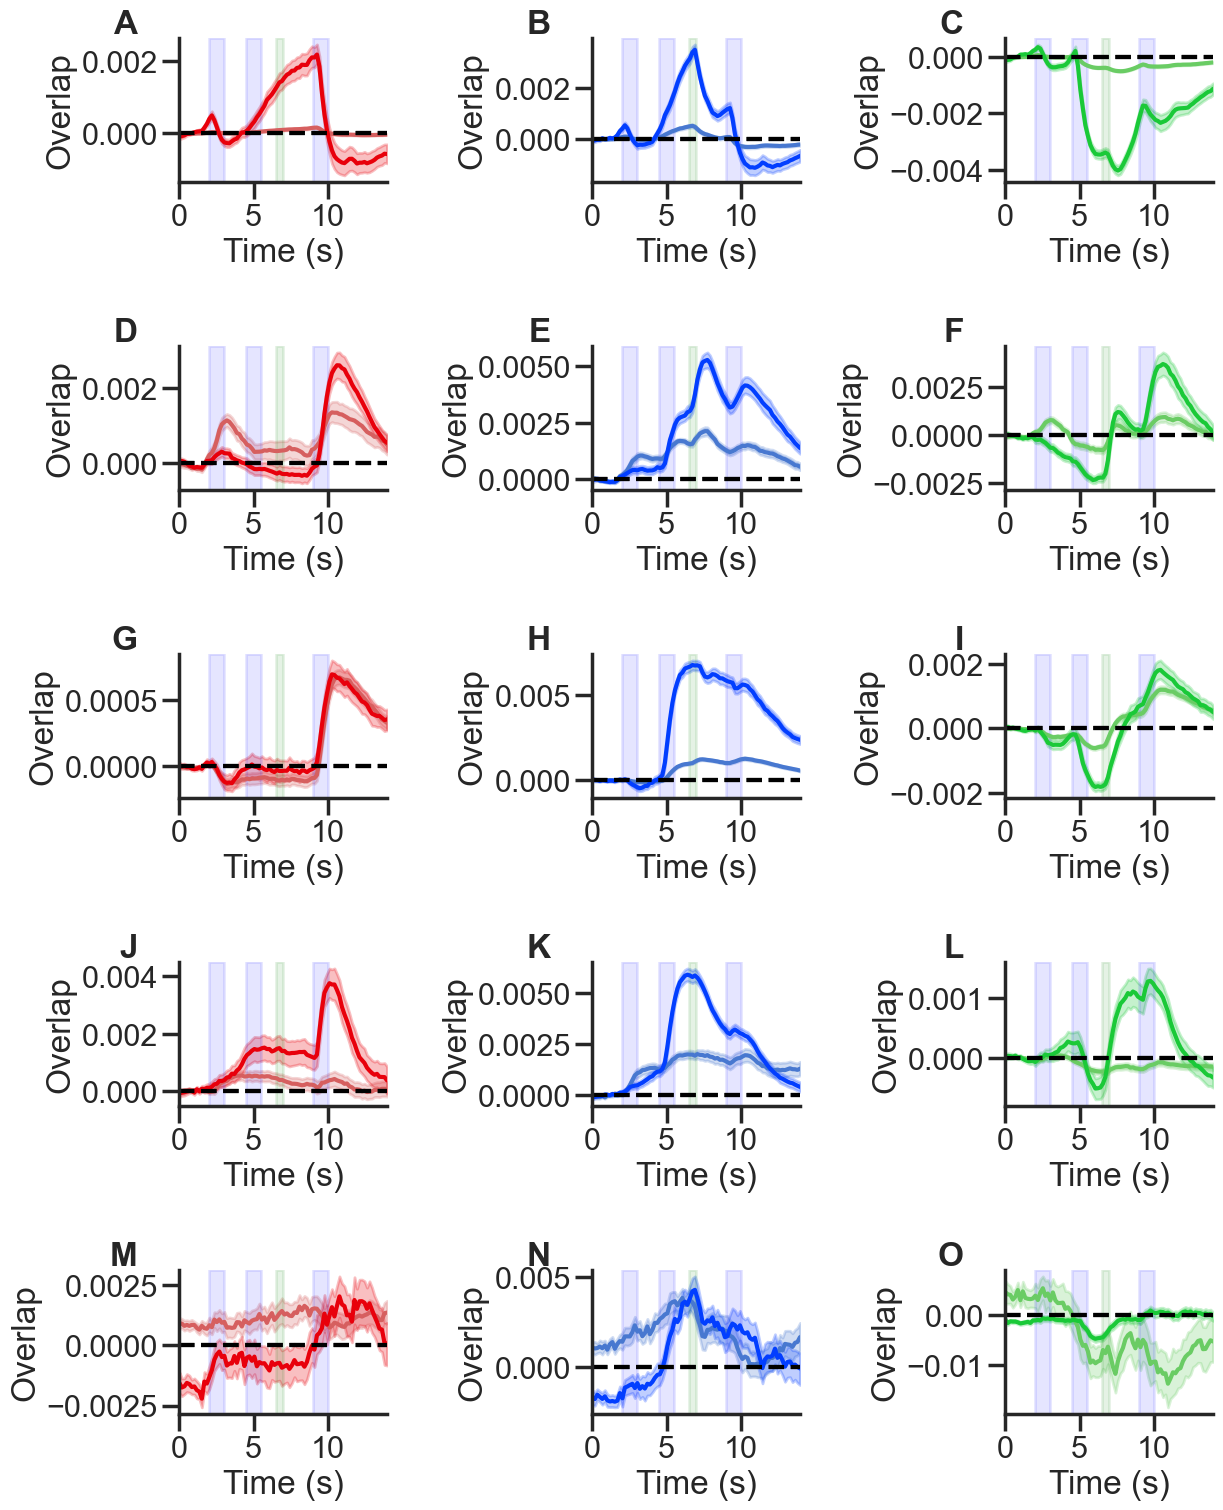

In [35]:
mice = ['ChRM04','JawsM15', 'JawsM18', 'ACCM03', 'ACCM04']
tasks = ['DPA', 'DualGo', 'DualNoGo']

files = ['../figs/' + i + '_' + j + '_distractor_overlap.pkl' for i in mice for j in tasks]
print(files)

figlist = [pkl.load(open(file, "rb")) for file in files]
print(figlist)
plt.close('all')

golden_ratio = (5**.5 - 1) / 2
width = 4.25
height = width * golden_ratio * 1.2
figsize = [width, height]

concat_fig('summary', figlist, dim=[len(mice), len(tasks)], size=figsize);

## Representational Dynamics



#### Imports



In [84]:
from dual_data.overlap.get_cos_day import run_get_cos_day

#### single mouse



loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 1 LASER 0
##########################################
single day
X_S1 (30, 693, 84) X_S2 (29, 693, 84)
n_max 29
X_avg (58, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 497
X_fs (58, 497)


samples (58,) features (693,) non zero 497
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 1 LASER 0
##########################################
single day
X_S1 (20, 693, 84) X_S2 (20, 693, 84)
n_max 20
X_avg (40, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 439
X_fs (40, 439)


samples (40,) features (693,) non zero 439
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 2 LASER 0
##########################################
single day
X_S1 (30, 693, 84) X_S2 (33, 693, 84)
n_max 30
X_avg (60, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 521
X_fs (60, 521)


samples (60,) features (693,) non zero 521
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 2 LASER 0
##########################################
single day
X_S1 (15, 693, 84) X_S2 (24, 693, 84)
n_max 15
X_avg (30, 693)


boots_coefs (1000, 693)
p_val (693,)
significant 435
X_fs (30, 435)


samples (30,) features (693,) non zero 435
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 3 LASER 0
##########################################
single day
X_S1 (35, 693, 84) X_S2 (38, 693, 84)
n_max 35
X_avg (70, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 518
X_fs (70, 518)


samples (70,) features (693,) non zero 518
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 3 LASER 0
##########################################
single day
X_S1 (20, 693, 84) X_S2 (26, 693, 84)
n_max 20
X_avg (40, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 454
X_fs (40, 454)


samples (40,) features (693,) non zero 454
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 4 LASER 0
##########################################
single day
X_S1 (45, 693, 84) X_S2 (44, 693, 84)
n_max 44
X_avg (88, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 487
X_fs (88, 487)


samples (88,) features (693,) non zero 487
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 4 LASER 0
##########################################
single day
X_S1 (27, 693, 84) X_S2 (30, 693, 84)
n_max 27
X_avg (54, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 517
X_fs (54, 517)


samples (54,) features (693,) non zero 517
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 5 LASER 0
##########################################
single day
X_S1 (36, 693, 84) X_S2 (34, 693, 84)
n_max 34
X_avg (68, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 489
X_fs (68, 489)


samples (68,) features (693,) non zero 489
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 5 LASER 0
##########################################
single day
X_S1 (24, 693, 84) X_S2 (21, 693, 84)
n_max 21
X_avg (42, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 507
X_fs (42, 507)


samples (42,) features (693,) non zero 507
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 6 LASER 0
##########################################
single day
X_S1 (43, 693, 84) X_S2 (47, 693, 84)
n_max 43
X_avg (86, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 510
X_fs (86, 510)


samples (86,) features (693,) non zero 510
coefs sample (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 6 LASER 0
##########################################
single day
X_S1 (27, 693, 84) X_S2 (31, 693, 84)
n_max 27
X_avg (54, 693)


boots_coefs (1000, 693)


p_val (693,)
significant 507
X_fs (54, 507)


samples (54,) features (693,) non zero 507
coefs dist (693,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 1 LASER 0
##########################################
single day
X_S1 (30, 693, 84) X_S2 (29, 693, 84)
n_max 29
X_avg (58, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 1 LASER 0
##########################################
single day
X_S1 (20, 693, 84) X_S2 (20, 693, 84)
n_max 20
X_avg (40, 693)


coefs dist (1000, 693)
cos_boot (1000,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 2 LASER 0
##########################################
single day
X_S1 (30, 693, 84) X_S2 (33, 693, 84)
n_max 30
X_avg (60, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 2 LASER 0
##########################################
single day
X_S1 (15, 693, 84) X_S2 (24, 693, 84)
n_max 15
X_avg (30, 693)


coefs dist (1000, 693)
cos_boot (1000,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 3 LASER 0
##########################################
single day
X_S1 (35, 693, 84) X_S2 (38, 693, 84)
n_max 35
X_avg (70, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 3 LASER 0
##########################################
single day
X_S1 (20, 693, 84) X_S2 (26, 693, 84)
n_max 20
X_avg (40, 693)


coefs dist (1000, 693)
cos_boot (1000,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 4 LASER 0
##########################################
single day
X_S1 (45, 693, 84) X_S2 (44, 693, 84)
n_max 44
X_avg (88, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 4 LASER 0
##########################################
single day
X_S1 (27, 693, 84) X_S2 (30, 693, 84)
n_max 27
X_avg (54, 693)


coefs dist (1000, 693)
cos_boot (1000,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 5 LASER 0
##########################################
single day
X_S1 (36, 693, 84) X_S2 (34, 693, 84)
n_max 34
X_avg (68, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 5 LASER 0
##########################################
single day
X_S1 (24, 693, 84) X_S2 (21, 693, 84)
n_max 21
X_avg (42, 693)


coefs dist (1000, 693)
cos_boot (1000,)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS 6 LASER 0
##########################################
single day
X_S1 (43, 693, 84) X_S2 (47, 693, 84)
n_max 43
X_avg (86, 693)


coefs sample (1000, 693)
##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN 0 PCA 0 METHOD bootstrap FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS 6 LASER 0
##########################################
single day
X_S1 (27, 693, 84) X_S2 (31, 693, 84)
n_max 27
X_avg (54, 693)


coefs dist (1000, 693)
cos_boot (1000,)


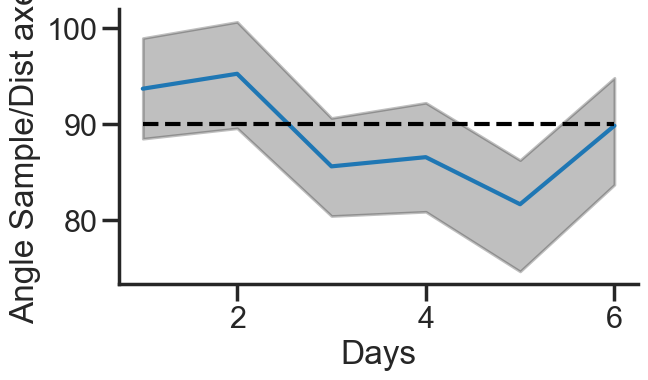

In [85]:
run_get_cos_day(mouse='JawsM15', method='bolasso', balance=1, bolasso_pval=0.001)

## Bump attractor Dynamics



#### Imports



In [29]:
from dual_data.overlap.get_cos import run_get_cos, plot_bump


#### Single mouse



In [38]:
X, y = run_get_cos(mouse='JawsM15', method='bolasso', day='first', task='DPA', bolasso_pval=0.05, prescreen='fdr')


loading files from /home/leon/dual_task/dual_data//data/JawsM15


##########################################
MODEL: SCALER robust IMBALANCE False PRESCREEN fdr PCA 0 METHOD bolasso FOLDS stratified CLF log_loss
##########################################
DATA: FEATURES distractor TASK Dual TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (55, 693, 84) X_S2 (70, 693, 84)
n_max 55


boots_coefs (1000, 693)
p_val (693,)
significant 177
X_fs (110, 177)


(177,) (177,) (693,)
samples (110,) features (693,) non zero 177
##########################################
DATA: FEATURES sample TASK all TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (95, 693, 84) X_S2 (100, 693, 84)
n_max 95


boots_coefs (1000, 693)
p_val (693,)
significant 217
X_fs (190, 217)


(217,) (217,) (693,)
samples (190,) features (693,) non zero 217
non zeros (693,)
(693,)
##########################################
DATA: FEATURES sample TASK DPA TRIALS correct DAYS first LASER 0
##########################################
multiple days
X_S1 (35, 693, 84) X_S2 (35, 693, 84)
n_max 35
(693,) (190, 693, 84)
(70, 693, 84)


(35, 84, 693)
(35, 693, 84)
(35, 693, 84)


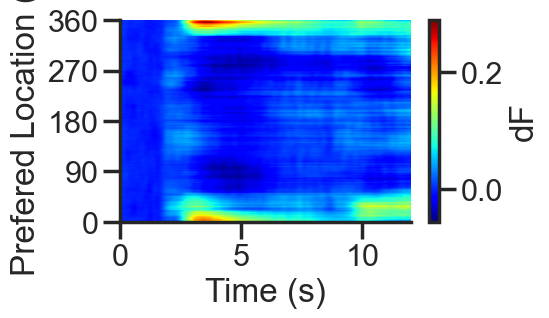

In [45]:
plot_bump(X, y, 0, 'all', 50)